<a href="https://colab.research.google.com/github/kanchan14kumari/sentiment-and-emotion-analysis-of-codemixed-data/blob/main/BiLstm_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding ,Bidirectional
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score

In [ ]:
#emotion
# Load datasets from CSV files
train_df_emotion = pd.read_csv("preprocessed_train.csv")
test_df_emotion = pd.read_csv("preprocessed_test.csv")
val_df_emotion = pd.read_csv("preprocessed_val.csv")

# Fill missing values in each dataset
train_df_emotion.fillna("", inplace=True)
val_df_emotion.fillna("", inplace=True)
test_df_emotion.fillna("", inplace=True)

# Define label mapping
label_map = {'anger': 0, 'fear': 1, 'joy': 2, 'disgust': 3, 'sadness': 4, 'surprise': 5, 'others': 6}

# Apply label encoding
train_df_emotion['emotion'] = train_df_emotion['emotion'].map(label_map)
val_df_emotion['emotion'] = val_df_emotion['emotion'].map(label_map)
test_df_emotion['emotion'] = test_df_emotion['emotion'].map(label_map)

# Convert all data to strings
train_texts = train_df_emotion['tweet'].astype(str).tolist()
val_texts = val_df_emotion['tweet'].astype(str).tolist()
test_texts = test_df_emotion['tweet'].astype(str).tolist()

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_texts)

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data_emotion = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data_emotion = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data_emotion = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [ ]:
# Define vocabulary size and embedding size
vocab_size = 2500  # Assuming you used 2500 as the num_words parameter in Tokenizer
embed_size = 100   # You can adjust this based on the embedding dimension you want

# Model
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape=(max_sequence_length,)))
model.add(Bidirectional(LSTM(units=264, activation='tanh')))
model.add(Dense(units=64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation='softmax'))  # Change units to match the number of classes (7 in this case)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data_emotion, train_df_emotion['emotion'], epochs=6, batch_size=128, verbose=2, validation_data=(val_data_emotion, val_df_emotion['emotion']))


Epoch 1/6
110/110 - 90s - loss: 1.3291 - accuracy: 0.4776 - val_loss: 1.1499 - val_accuracy: 0.5470 - 90s/epoch - 815ms/step
Epoch 2/6
110/110 - 80s - loss: 1.0656 - accuracy: 0.6015 - val_loss: 1.1146 - val_accuracy: 0.5727 - 80s/epoch - 725ms/step
Epoch 3/6
110/110 - 82s - loss: 0.9888 - accuracy: 0.6315 - val_loss: 1.1917 - val_accuracy: 0.5713 - 82s/epoch - 741ms/step
Epoch 4/6
110/110 - 83s - loss: 0.9334 - accuracy: 0.6511 - val_loss: 1.2344 - val_accuracy: 0.5517 - 83s/epoch - 757ms/step
Epoch 5/6
110/110 - 80s - loss: 0.8839 - accuracy: 0.6681 - val_loss: 1.1996 - val_accuracy: 0.5637 - 80s/epoch - 725ms/step
Epoch 6/6
110/110 - 86s - loss: 0.8316 - accuracy: 0.6863 - val_loss: 1.2659 - val_accuracy: 0.5547 - 86s/epoch - 780ms/step


In [ ]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data_emotion, test_df_emotion['emotion'])
print("Test accuracy of bilstm sequential  model for emotion classification:", test_acc)


94/94 [==============================] - 7s 77ms/step - loss: 1.1113 - accuracy: 0.5980
Test accuracy of bilstm sequential  model for emotion classification: 0.5979999899864197


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Get model predictions
predictions = model.predict(test_data_emotion)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_df_emotion['emotion'].values, predicted_labels)
precision = precision_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')
recall = recall_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')
f1 = f1_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


94/94 [==============================] - 9s 96ms/step
Accuracy: 0.598
Precision: 0.5974435860634796
Recall: 0.598
F1 Score: 0.5889794388294858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 14s 144ms/step


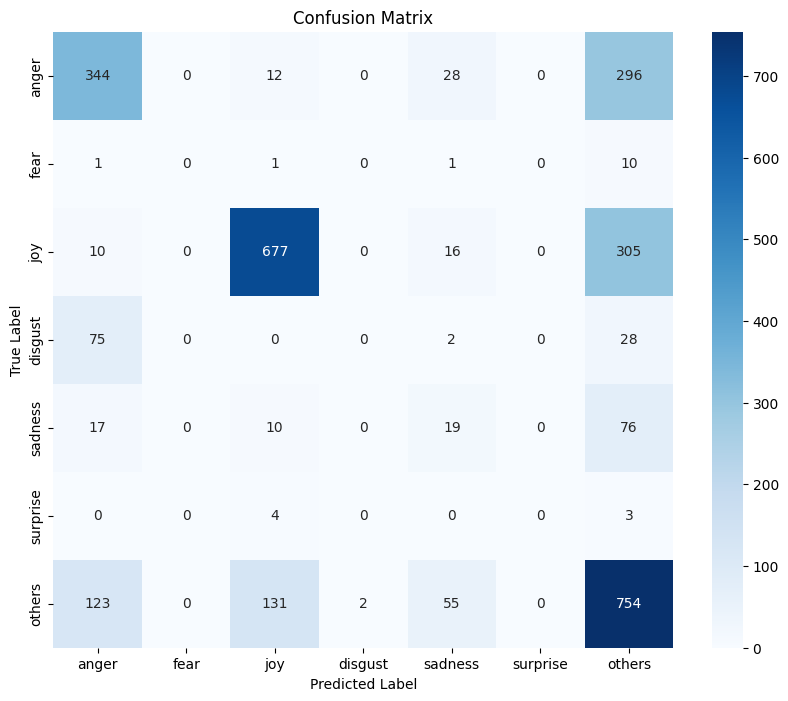

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions
predictions = model.predict(test_data_emotion)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_df_emotion['emotion'].values, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


94/94 [==============================] - 13s 133ms/step


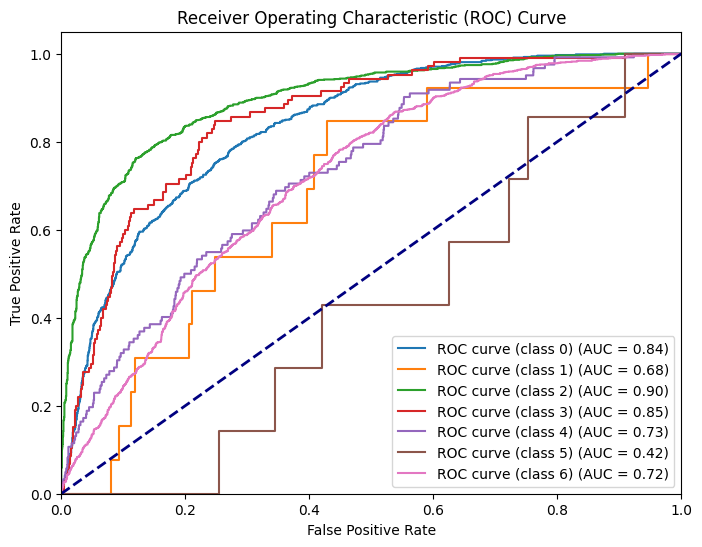

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
predicted_probabilities = model.predict(test_data_emotion)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr = []
all_tpr = []
all_auc = []

# Compute ROC curve and ROC area for each class
num_classes = predicted_probabilities.shape[1]
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_df_emotion['emotion'].values == i, predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(all_fpr[i], all_tpr[i], label=f'ROC curve (class {i}) (AUC = {all_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense

# Load sentiment datasets from CSV files
train_df_sentiment = pd.read_csv("/content/preprocessed_train.csv")
test_df_sentiment = pd.read_csv("/content/preprocessed_test.csv")
val_df_sentiment = pd.read_csv("/content/preprocessed_val.csv")

# Fill missing values in each dataset
train_df_sentiment.fillna("", inplace=True)
val_df_sentiment.fillna("", inplace=True)
test_df_sentiment.fillna("", inplace=True)

# Define label mapping
sentiment_label_map = {'neutral': 0, 'positive': 1, 'negative': 2}

# Apply label encoding
train_df_sentiment['sentiment'] = train_df_sentiment['sentiment'].map(sentiment_label_map)
val_df_sentiment['sentiment'] = val_df_sentiment['sentiment'].map(sentiment_label_map)
test_df_sentiment['sentiment'] = test_df_sentiment['sentiment'].map(sentiment_label_map)

# Convert all data to strings
train_texts_sentiment = train_df_sentiment['tweet'].astype(str).tolist()
val_texts_sentiment = val_df_sentiment['tweet'].astype(str).tolist()
test_texts_sentiment = test_df_sentiment['tweet'].astype(str).tolist()

# Tokenize the data
tokenizer_sentiment = Tokenizer(num_words=2500, split=' ')
tokenizer_sentiment.fit_on_texts(train_texts_sentiment)

# Convert text data to sequences
train_sequences_sentiment = tokenizer_sentiment.texts_to_sequences(train_texts_sentiment)
val_sequences_sentiment = tokenizer_sentiment.texts_to_sequences(val_texts_sentiment)
test_sequences_sentiment = tokenizer_sentiment.texts_to_sequences(test_texts_sentiment)

# Pad sequences to ensure uniform length
max_sequence_length_sentiment = 50  # Choose an appropriate sequence length
train_data_sentiment = pad_sequences(train_sequences_sentiment, maxlen=max_sequence_length_sentiment)
val_data_sentiment = pad_sequences(val_sequences_sentiment, maxlen=max_sequence_length_sentiment)
test_data_sentiment = pad_sequences(test_sequences_sentiment, maxlen=max_sequence_length_sentiment)



In [ ]:
# Define vocabulary size and embedding size
vocab_size = 2500  # Assuming you used 2500 as the num_words parameter in Tokenizer
embed_size = 100   # You can adjust this based on the embedding dimension you want

# Model
model_sentiment = Sequential()
model_sentiment.add(Embedding(vocab_size, embed_size, input_shape=(max_sequence_length_sentiment,)))
model_sentiment.add(Bidirectional(LSTM(units=264, activation='tanh')))
model_sentiment.add(Dense(units=64, activation='tanh'))
model_sentiment.add(Dropout(0.5))
model_sentiment.add(Dense(units=3, activation='softmax'))  # Output dimension changed to 3 for sentiment classes

model_sentiment.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sentiment = model_sentiment.fit(train_data_sentiment, train_df_sentiment['sentiment'], epochs=6, batch_size=128, verbose=2, validation_data=(val_data_sentiment, val_df_sentiment['sentiment']))





Epoch 1/6
110/110 - 96s - loss: 0.9444 - accuracy: 0.5229 - val_loss: 0.8706 - val_accuracy: 0.5863 - 96s/epoch - 876ms/step
Epoch 2/6
110/110 - 89s - loss: 0.8021 - accuracy: 0.6394 - val_loss: 0.8742 - val_accuracy: 0.5950 - 89s/epoch - 807ms/step
Epoch 3/6
110/110 - 80s - loss: 0.7445 - accuracy: 0.6745 - val_loss: 0.9023 - val_accuracy: 0.5797 - 80s/epoch - 725ms/step
Epoch 4/6
110/110 - 86s - loss: 0.7011 - accuracy: 0.6988 - val_loss: 0.9308 - val_accuracy: 0.5713 - 86s/epoch - 780ms/step
Epoch 5/6
110/110 - 79s - loss: 0.6525 - accuracy: 0.7246 - val_loss: 1.0008 - val_accuracy: 0.5670 - 79s/epoch - 722ms/step
Epoch 6/6
110/110 - 80s - loss: 0.6042 - accuracy: 0.7446 - val_loss: 1.0233 - val_accuracy: 0.5613 - 80s/epoch - 725ms/step


In [ ]:
# Evaluate the sentiment model on the test set
test_loss_sentiment, test_acc_sentiment = model_sentiment.evaluate(test_data_sentiment, test_df_sentiment['sentiment'])
print("Test accuracy of Bidirectional LSTM model for sentiment classification:", test_acc_sentiment)


94/94 [==============================] - 8s 86ms/step - loss: 0.9325 - accuracy: 0.5980
Test accuracy of Bidirectional LSTM model for sentiment classification: 0.5979999899864197


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get model predictions for sentiment classification
predictions_sentiment = model_sentiment.predict(test_data_sentiment)

# Convert predictions to class labels
predicted_labels_sentiment = np.argmax(predictions_sentiment, axis=1)

# Calculate metrics for sentiment classification
accuracy_sentiment = accuracy_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment)
precision_sentiment = precision_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment, average='weighted')
recall_sentiment = recall_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment, average='weighted')
f1_sentiment = f1_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment, average='weighted')

# Print metrics for sentiment classification
print("Accuracy for sentiment classification:", accuracy_sentiment)
print("Precision for sentiment classification:", precision_sentiment)
print("Recall for sentiment classification:", recall_sentiment)
print("F1 Score for sentiment classification:", f1_sentiment)


94/94 [==============================] - 9s 73ms/step
Accuracy for sentiment classification: 0.598
Precision for sentiment classification: 0.6069320722301222
Recall for sentiment classification: 0.598
F1 Score for sentiment classification: 0.600285866803724


94/94 [==============================] - 9s 95ms/step


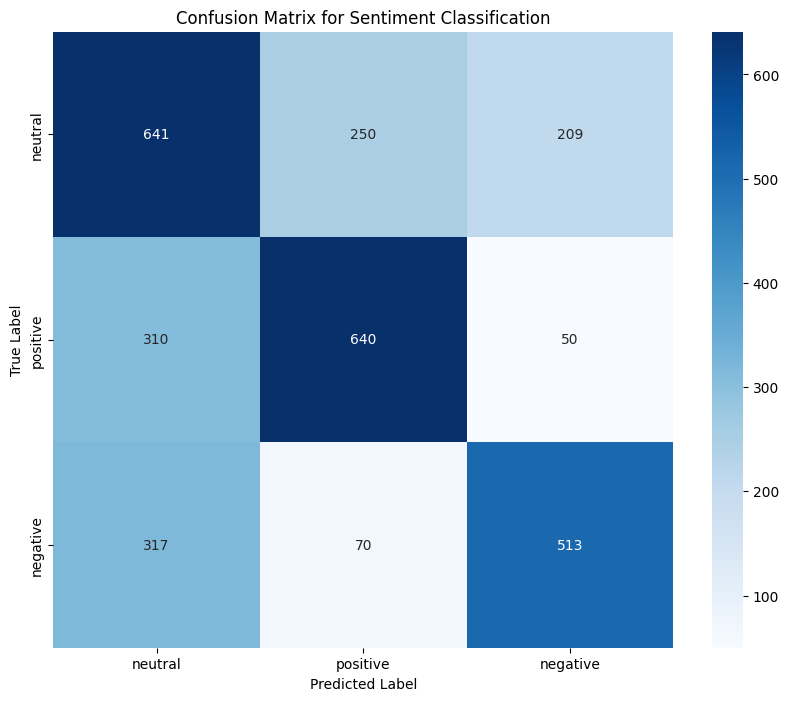

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define sentiment classes
sentiment_classes = ['neutral', 'positive', 'negative']

# Get model predictions for sentiment classification
predictions_sentiment = model_sentiment.predict(test_data_sentiment)
predicted_labels_sentiment = np.argmax(predictions_sentiment, axis=1)

# Calculate confusion matrix for sentiment classification
conf_matrix_sentiment = confusion_matrix(test_df_sentiment['sentiment'].values, predicted_labels_sentiment)

# Plot confusion matrix for sentiment classification
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sentiment, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sentiment Classification')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=sentiment_classes)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=sentiment_classes)
plt.show()


94/94 [==============================] - 8s 86ms/step


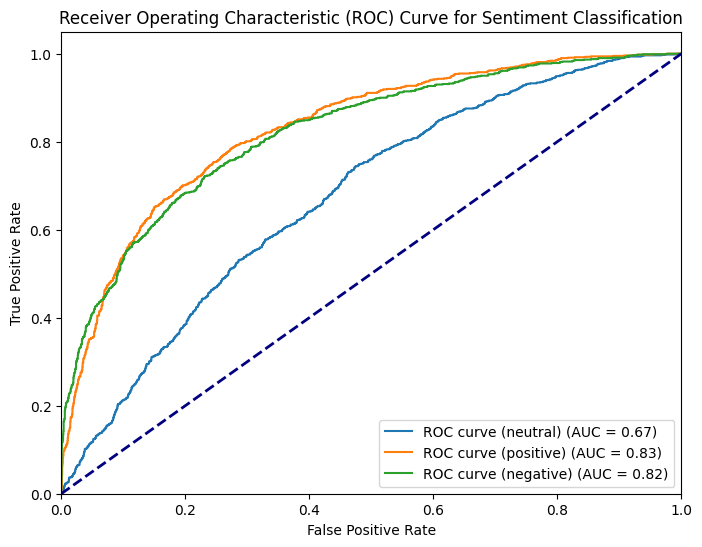

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class for sentiment classification
predicted_probabilities_sentiment = model_sentiment.predict(test_data_sentiment)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr_sentiment = []
all_tpr_sentiment = []
all_auc_sentiment = []

# Define sentiment classes
sentiment_classes = ['neutral', 'positive', 'negative']

# Compute ROC curve and ROC area for each class for sentiment classification
num_classes_sentiment = predicted_probabilities_sentiment.shape[1]
for i in range(num_classes_sentiment):
    fpr_sentiment, tpr_sentiment, _ = roc_curve(test_df_sentiment['sentiment'].values == i, predicted_probabilities_sentiment[:, i])
    roc_auc_sentiment = auc(fpr_sentiment, tpr_sentiment)
    all_fpr_sentiment.append(fpr_sentiment)
    all_tpr_sentiment.append(tpr_sentiment)
    all_auc_sentiment.append(roc_auc_sentiment)

# Plot ROC curve for each class for sentiment classification
plt.figure(figsize=(8, 6))
for i in range(num_classes_sentiment):
    plt.plot(all_fpr_sentiment[i], all_tpr_sentiment[i], label=f'ROC curve ({sentiment_classes[i]}) (AUC = {all_auc_sentiment[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Sentiment Classification')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# for combined
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense
# Load dataset from CSV file
train_df = pd.read_csv("/content/preprocessed_train.csv")  # Update path to your training dataset
test_df = pd.read_csv("/content/preprocessed_test.csv")    # Update path to your testing dataset
val_df = pd.read_csv("/content/preprocessed_val.csv")      # Update path to your validation dataset

# Combine sentiment and emotion labels into a single label
train_df['combined_label'] = train_df['sentiment'] + "_" + train_df['emotion']
test_df['combined_label'] = test_df['sentiment'] + "_" + test_df['emotion']
val_df['combined_label'] = val_df['sentiment'] + "_" + val_df['emotion']

# Convert all data to strings
train_df['tweet'] = train_df['tweet'].astype(str)
test_df['tweet'] = test_df['tweet'].astype(str)
val_df['tweet'] = val_df['tweet'].astype(str)

# Encode the combined label
label_encoder = LabelEncoder()
train_df['combined_label_encoded'] = label_encoder.fit_transform(train_df['combined_label'])
test_df['combined_label_encoded'] = label_encoder.transform(test_df['combined_label'])
val_df['combined_label_encoded'] = label_encoder.transform(val_df['combined_label'])

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_df['tweet'])

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_df['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_df['tweet'])

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [ ]:
# Import Dropout layer
from tensorflow.keras.layers import Dropout


In [ ]:
# Define vocabulary size and embedding size
vocab_size = 2500  # Assuming you used 2500 as the num_words parameter in Tokenizer
embed_size = 100   # You can adjust this based on the embedding dimension you want

# Model
model_combined = Sequential()
model_combined.add(Embedding(vocab_size, embed_size, input_shape=(max_sequence_length,)))
model_combined.add(Bidirectional(LSTM(units=264, activation='tanh')))
model_combined.add(Dense(units=64, activation='tanh'))
model_combined.add(Dropout(0.5))
# Output dimension changed to the number of combined classes
num_combined_classes = len(label_encoder.classes_)
model_combined.add(Dense(units=num_combined_classes, activation='softmax'))

model_combined.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_combined = model_combined.fit(train_data, train_df['combined_label_encoded'], epochs=6, batch_size=128, verbose=2, validation_data=(val_data, val_df['combined_label_encoded']))


Epoch 1/6
110/110 - 93s - loss: 2.0966 - accuracy: 0.3361 - val_loss: 1.7398 - val_accuracy: 0.4713 - 93s/epoch - 843ms/step
Epoch 2/6
110/110 - 81s - loss: 1.7078 - accuracy: 0.4857 - val_loss: 1.6872 - val_accuracy: 0.5093 - 81s/epoch - 737ms/step
Epoch 3/6
110/110 - 86s - loss: 1.6044 - accuracy: 0.5201 - val_loss: 1.7107 - val_accuracy: 0.4967 - 86s/epoch - 779ms/step
Epoch 4/6
110/110 - 83s - loss: 1.5345 - accuracy: 0.5411 - val_loss: 1.7440 - val_accuracy: 0.4917 - 83s/epoch - 758ms/step
Epoch 5/6
110/110 - 85s - loss: 1.4815 - accuracy: 0.5504 - val_loss: 1.7810 - val_accuracy: 0.4850 - 85s/epoch - 777ms/step
Epoch 6/6
110/110 - 81s - loss: 1.4217 - accuracy: 0.5629 - val_loss: 1.8034 - val_accuracy: 0.4840 - 81s/epoch - 739ms/step


In [ ]:
# Evaluate the combined model on the test set
test_loss_combined, test_acc_combined = model_combined.evaluate(test_data, test_df['combined_label_encoded'])
print("Test accuracy of combined model for sentiment and emotion classification:", test_acc_combined)


94/94 [==============================] - 8s 89ms/step - loss: 1.5922 - accuracy: 0.5310
Test accuracy of combined model for sentiment and emotion classification: 0.531000018119812


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Get model predictions for combined classification
predictions_combined = model_combined.predict(test_data)

# Convert predictions to class labels
predicted_labels_combined = np.argmax(predictions_combined, axis=1)

# Calculate metrics for combined classification
accuracy_combined = accuracy_score(test_df['combined_label_encoded'].values, predicted_labels_combined)
precision_combined = precision_score(test_df['combined_label_encoded'].values, predicted_labels_combined, average='weighted')
recall_combined = recall_score(test_df['combined_label_encoded'].values, predicted_labels_combined, average='weighted')
f1_combined = f1_score(test_df['combined_label_encoded'].values, predicted_labels_combined, average='weighted')

# Print metrics for combined classification
print("Accuracy for combined classification:", accuracy_combined)
print("Precision for combined classification:", precision_combined)
print("Recall for combined classification:", recall_combined)
print("F1 Score for combined classification:", f1_combined)


94/94 [==============================] - 11s 113ms/step
Accuracy for combined classification: 0.531
Precision for combined classification: 0.45615657954002914
Recall for combined classification: 0.531
F1 Score for combined classification: 0.4780524414518558


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 9s 98ms/step


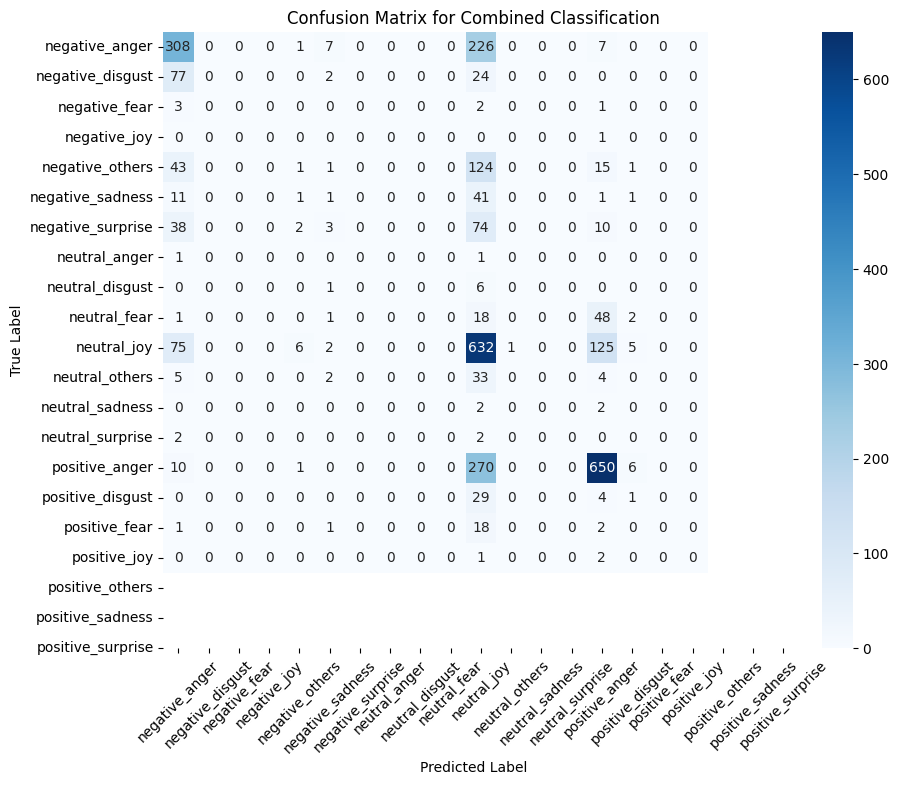

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Define combined classes
combined_classes = label_encoder.classes_

# Get model predictions for combined classification
predictions_combined = model_combined.predict(test_data)
predicted_labels_combined = np.argmax(predictions_combined, axis=1)

# Calculate confusion matrix for combined classification
conf_matrix_combined = confusion_matrix(test_df['combined_label_encoded'].values, predicted_labels_combined)

# Plot confusion matrix for combined classification
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Combined Classification')
plt.xticks(ticks=np.arange(len(combined_classes)) + 0.5, labels=combined_classes, rotation=45)
plt.yticks(ticks=np.arange(len(combined_classes)) + 0.5, labels=combined_classes, rotation=0)
plt.show()


94/94 [==============================] - 11s 114ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


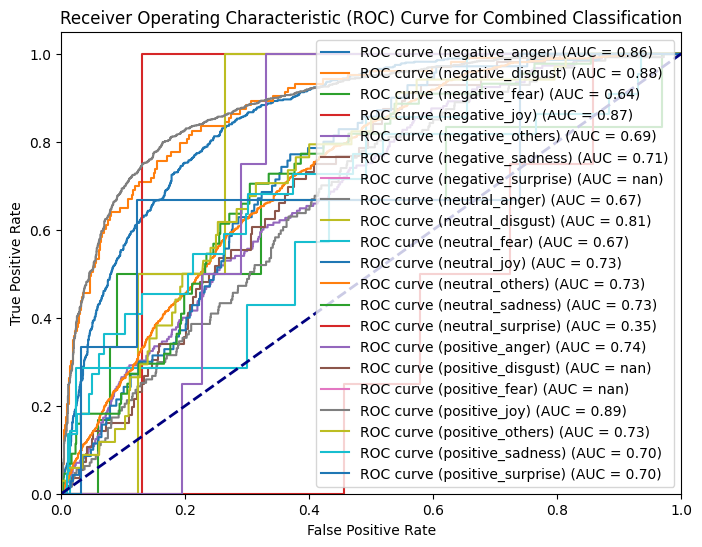

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for each class for combined classification
predicted_probabilities_combined = model_combined.predict(test_data)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr_combined = []
all_tpr_combined = []
all_auc_combined = []

# Compute ROC curve and ROC area for each class for combined classification
num_classes_combined = predicted_probabilities_combined.shape[1]
for i in range(num_classes_combined):
    fpr_combined, tpr_combined, _ = roc_curve(test_df['combined_label_encoded'].values == i, predicted_probabilities_combined[:, i])
    roc_auc_combined = auc(fpr_combined, tpr_combined)
    all_fpr_combined.append(fpr_combined)
    all_tpr_combined.append(tpr_combined)
    all_auc_combined.append(roc_auc_combined)

# Plot ROC curve for each class for combined classification
plt.figure(figsize=(8, 6))
for i in range(num_classes_combined):
    plt.plot(all_fpr_combined[i], all_tpr_combined[i], label=f'ROC curve ({combined_classes[i]}) (AUC = {all_auc_combined[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Combined Classification')
plt.legend(loc='lower right')
plt.show()
